<h1>Student Performance</h1>

## Dataset Name : “Student Performance Data Set”.

Source : UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Student+Performance)

### Information :
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (<a href='http://www3.dsi.uminho.pt/pcortez/student.pdf'>see paper source for more details</a>).

In [18]:
# import libraries
import numpy as np
import matplotlib
import pandas as pd
import sklearn

In [19]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

In [20]:
# Load Dataset
url = "data/"
matDS=pd.read_csv(url+'student-mat.csv',sep=';')
porDS=pd.read_csv(url+'student-por.csv',sep=';')
# Merging two datasets 
dataSet=pd.concat([matDS,porDS])
dataSet.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Features:

In [21]:
dataSet.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric):
<ul>
    <li>0 - none</li>
    <li>1 - primary education (4th grade)</li>
    <li>3 - secondary education </li>
    <li>4 - higher education</li>
</ul>
8. Fedu - father's education (numeric):
<ul>
    <li>0 - none</li>
    <li>1 - primary education (4th grade)</li>
    <li>3 - secondary education </li>
    <li>4 - higher education</li>
</ul>
9. Mjob - mother's job (nominal): 
<ul>
    <li>'teacher'</li>
    <li>'health' care related</li>
    <li>civil 'services' (e.g. administrative or police)</li>
    <li>'at_home'</li>
    <li> 'other'</li>
</ul>
10. Fjob - father's job (nominal): 
<ul>
    <li>'teacher'</li>
    <li>'health' care related</li>
    <li>civil 'services' (e.g. administrative or police)</li>
    <li>'at_home'</li>
    <li> 'other'</li>
</ul>
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
#### Output target
33. G3 - final grade (numeric: from 0 to 20)

In [22]:
# remove output target and assin it to y
y=dataSet['G3']
dataSet=dataSet.drop(columns=['G3'])

## Preprocessing features
In this data set we have 3 different type of features, <b>binary</b> that has true of false, of or like sex column, F or M which show Female of Male. <b>numeric</b> that contents number value and <b>nominal</b> which filed by some string values. About numeric data, no need to do any thing but shoud do data tranfsormation for binary and nominal data. 

In [23]:
def feature_transfer_label_encoder(fieldName):
    before=dataSet.groupby(fieldName).size()
    leVar = preprocessing.LabelEncoder()
    dataSet[fieldName] =leVar.fit_transform(dataSet[fieldName]) 
    after=dataSet.groupby(fieldName).size()  
    print(fieldName,' :')
    print('    -',before.index[0],'->',after.index[0],', Count: ',after[0])
    print('    -',before.index[1],'->',after.index[1],', Count: ',after[1])

In [24]:
# Convert binary data to 0 and 1
binaryFields=['sex','address','school','famsize','Pstatus',   'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for f in binaryFields:
    feature_transfer_label_encoder(f)

sex  :
    - F -> 0 , Count:  591
    - M -> 1 , Count:  453
address  :
    - R -> 0 , Count:  285
    - U -> 1 , Count:  759
school  :
    - GP -> 0 , Count:  772
    - MS -> 1 , Count:  272
famsize  :
    - GT3 -> 0 , Count:  738
    - LE3 -> 1 , Count:  306
Pstatus  :
    - A -> 0 , Count:  121
    - T -> 1 , Count:  923
schoolsup  :
    - no -> 0 , Count:  925
    - yes -> 1 , Count:  119
famsup  :
    - no -> 0 , Count:  404
    - yes -> 1 , Count:  640
paid  :
    - no -> 0 , Count:  824
    - yes -> 1 , Count:  220
activities  :
    - no -> 0 , Count:  528
    - yes -> 1 , Count:  516
nursery  :
    - no -> 0 , Count:  209
    - yes -> 1 , Count:  835
higher  :
    - no -> 0 , Count:  89
    - yes -> 1 , Count:  955
internet  :
    - no -> 0 , Count:  217
    - yes -> 1 , Count:  827
romantic  :
    - no -> 0 , Count:  673
    - yes -> 1 , Count:  371


In [25]:
def feature_transfer_nominal_convertor(fieldName):
    dummy_data=pd.get_dummies(dataSet[fieldName], prefix=fieldName)
    dummy_data=dummy_data.drop(columns=[fieldName+'_other']) # remove other field from dummy data
    res=pd.concat([dataSet, dummy_data], axis=1, sort=False) # concat dummy data with main data set
    res=res.drop(columns=[fieldName]) # remove original field from result
    return res


In [26]:
nominalFields=['Mjob', 'Fjob','reason','guardian']
for f in nominalFields:
    tr=feature_transfer_nominal_convertor(f)
    dataSet=tr # fill main data set with converted data

In [27]:
dataSet.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,1,1,0,0,0,1
1,0,0,17,1,0,1,1,1,1,2,...,0,0,0,0,0,1,0,0,1,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,1,0,0,1,0,0,1
4,0,0,16,1,0,1,3,3,1,2,...,0,0,0,0,0,0,1,0,1,0


<hr/>

In [28]:
# Split-out validation and test dataset
# array=dataSet.values
X=dataSet
# validation_size=0.20
# seed=7
# X_train,X_validation,y_train,y_validation=model_selection.train_test_split(
#     X,y,test_size=validation_size,random_state=seed)

In [29]:
# print(X_train.shape)
# print(X_validation.shape)
# print(y_train.shape)
# print(y_validation.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val   = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(626, 41)
(209, 41)
(209, 41)
(626,)
(209,)
(209,)


In [30]:
# X_train['G2'].unique()

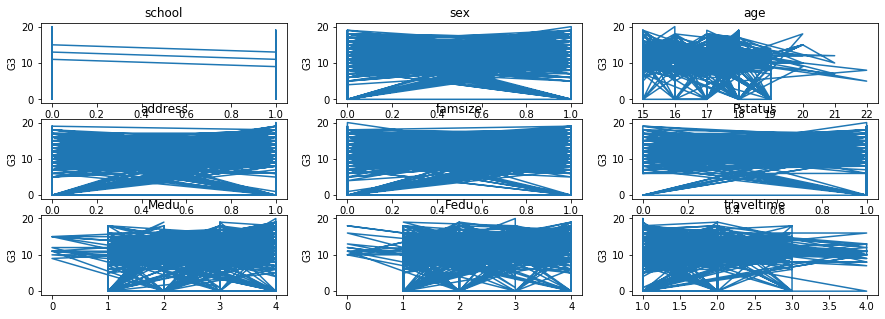

In [60]:
# plot

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(3, 3,figsize=(15,5))
xnum=0
for i in range(3):
    for j in range(3):
        ax[i,j].plot(X[X.columns[xnum]], y)
        ax[i,j].set_title(X.columns[xnum])
        ax[i,j].set_ylabel('G3')
        xnum +=1


plt.show()

In [14]:
# KNN
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
pred=knn.predict(X_val)
knn_error = mean_squared_error(y_val, pred)
print(knn_error)
print(knn.score(X_test,y_test))

5.583732057416268
0.3444976076555024


In [57]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)    # create an object for linear predictors
reg = reg.fit(X_train, y_train)    # find best linear predictor (minimize training error)
pred = reg.predict(X_val)    # compute predictions of best predictors 
linreg_error = mean_squared_error(y_val, pred)    # compute training error 
print(linreg_error)
print(reg.score(X_test,y_test))

3.117792390114332
0.8228368759326073


In [56]:
# LinearRegression + scale
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)    # create an object for linear predictors
reg = reg.fit(X_train, y_train)    # find best linear predictor (minimize training error)
pred = reg.predict(X_val)    # compute predictions of best predictors 
linreg_error = mean_squared_error(y_val, pred)    # compute training error 
print(linreg_error)
print(reg.score(X_test,y_test))

3.117792390114332
0.8228368759326073


In [66]:
# LogisticRegression
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(random_state=0,C=1e6,solver='lbfgs', max_iter=100)
# log_reg.fit(X_train,y_train)
# y_pred = log_reg.predict(X_val)
# log_reg_error = mean_squared_error(y_val, pred)
# print(log_reg_error)
# print(log_reg.score(X_test,y_test))

In [67]:
# LogisticRegression + scale
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(random_state=0,C=1e6)
# X_train_scale=preprocessing.scale(X_train)
# log_reg.fit(X_train_scale,y_train)
# y_pred = log_reg.predict(X_val)
# log_reg_error = mean_squared_error(y_val, pred)
# print(log_reg_error)
# print(log_reg.score(X_test,y_test))


In [12]:
# Test option and evaluation metric
scoring = 'accuracy'

In [80]:
models=[]
# models.append(('LR',LogisticRegression()))
# models.append(('REG',LinearRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC()))

In [81]:
# evaluate each model
results=[]
names=[]


# clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# clf.predict(X_validation)

# clf.predict_proba(X[:2, :])


# clf.score(X_validation, y_validation)

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    names.append(name)
    msg= "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.293958 (0.040534)
SVM: 0.300358 (0.076193)
